In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import sys
sys.path.append("lib")

import lib

import torch
torch.set_default_dtype(torch.float64)

from functorch import vmap
from torch.utils.data import DataLoader
import tqdm

/home/peiyi/mambaforge3/envs/rom/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device("cuda")

In [4]:
coords_x, coords_y, _ = lib.utils.read_coords("2d_burger_data/time_step_0.csv")
coords = torch.stack((coords_x, coords_y), dim=1)

In [5]:
num_steps = 501
num_nodes = coords_x.shape[0]

datas = lib.utils.read_data(num_steps, num_nodes, '2d_burger_data/time_step_', 'vel_0')
datas.shape

torch.Size([501, 14641])

In [6]:
N = datas.shape[1]
n = 20
mu = int(np.ceil(N/40))
neighbours = lib.utils.topk_neighbours(coords, mu)

In [7]:
batch_size = 30
train_data = DataLoader(datas, batch_size=batch_size, shuffle=True)

In [8]:
ed = lib.nrbs.EncoderDecoder(N=N, n=n, mu=mu, neighbours=neighbours, device=device)

In [9]:
ed.train(train_data_loader=train_data, epochs=100)

100%|██████████| 17/17 [00:06<00:00,  2.43it/s]


Itr 0, loss = 12627.858546268506


100%|██████████| 17/17 [00:06<00:00,  2.52it/s]


Itr 1, loss = 2583.146720476421


100%|██████████| 17/17 [00:06<00:00,  2.51it/s]


Itr 2, loss = 1768.1131207222224


100%|██████████| 17/17 [00:06<00:00,  2.51it/s]


Itr 3, loss = 1253.1035162494284


100%|██████████| 17/17 [00:06<00:00,  2.50it/s]


Itr 4, loss = 709.4937662881242


100%|██████████| 17/17 [00:06<00:00,  2.50it/s]


Itr 5, loss = 480.12378892545684


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 6, loss = 384.59212374487277


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 7, loss = 354.5791016587421


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 8, loss = 327.75000162055954


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 9, loss = 289.6978669111603


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 10, loss = 240.2568838400909


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 11, loss = 207.27670942122143


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 12, loss = 190.55907505509683


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 13, loss = 174.01017877858175


100%|██████████| 17/17 [00:06<00:00,  2.49it/s]


Itr 14, loss = 159.65798431559645


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 15, loss = 143.1254015588231


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 16, loss = 128.38242675442112


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 17, loss = 119.36108690857705


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 18, loss = 114.74109726283056


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 19, loss = 108.51117734681976


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 20, loss = 102.21159957601205


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 21, loss = 92.79112547447218


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 22, loss = 86.01163572236581


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 23, loss = 78.986432823861


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 24, loss = 73.94740268065799


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 25, loss = 71.26306358658827


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 26, loss = 69.37174562542295


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 27, loss = 68.17374441019675


100%|██████████| 17/17 [00:06<00:00,  2.48it/s]


Itr 28, loss = 66.75674758694254


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 29, loss = 66.34640037090045


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 30, loss = 64.25804228938217


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 31, loss = 62.995820711440544


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 32, loss = 60.7376216583145


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 33, loss = 58.15192316630216


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 34, loss = 54.12503201194782


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 35, loss = 51.386278747583255


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 36, loss = 48.4534518590057


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 37, loss = 46.31978967416619


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 38, loss = 46.43822536130251


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 39, loss = 44.12642629641973


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 40, loss = 43.604056339267665


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 41, loss = 42.48793186462566


100%|██████████| 17/17 [00:06<00:00,  2.47it/s]


Itr 42, loss = 41.112757232134946


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 43, loss = 39.585462872370975


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 44, loss = 38.19413537495307


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 45, loss = 37.24714344627922


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 46, loss = 35.853811395801436


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 47, loss = 35.95812946367279


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 48, loss = 35.84463675598521


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 49, loss = 33.711988755862386


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 50, loss = 38.069458426910415


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 51, loss = 59.93183278380979


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 52, loss = 42.34078892004783


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 53, loss = 35.40223269561472


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 54, loss = 32.20555159231958


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 55, loss = 30.63283803574223


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 56, loss = 28.375862569018004


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 57, loss = 26.99202640495179


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 58, loss = 26.663470978477605


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 59, loss = 28.562812254971735


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 60, loss = 26.68758946150625


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 61, loss = 26.27616598210279


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 62, loss = 25.72543981541278


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 63, loss = 25.500158748742475


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 64, loss = 25.349037037777286


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 65, loss = 25.77980560283115


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 66, loss = 26.443356786527513


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 67, loss = 25.3992498138761


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 68, loss = 25.651164447137756


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 69, loss = 33.311987454934766


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 70, loss = 27.03113889582471


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 71, loss = 26.66851092079624


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 72, loss = 36.037330862871386


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 73, loss = 33.10172874019143


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 74, loss = 36.782448811837554


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 75, loss = 27.797611734905555


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 76, loss = 24.933560978521527


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 77, loss = 22.788250809609632


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 78, loss = 21.226446523276124


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 79, loss = 21.700402463080593


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 80, loss = 23.152133056343775


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 81, loss = 37.433188824951294


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 82, loss = 27.27585364818416


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 83, loss = 33.33532191802601


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 84, loss = 25.033600081847155


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 85, loss = 28.389323341896326


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 86, loss = 26.134954739269883


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 87, loss = 29.13804434544294


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 88, loss = 25.420583437664643


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 89, loss = 24.350978345124933


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]


Itr 90, loss = 23.057921668875192


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 91, loss = 29.64593489404895


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 92, loss = 26.94016551079224


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 93, loss = 23.689568195867828


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 94, loss = 21.83551874775226


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 95, loss = 24.1248005912682


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 96, loss = 34.27471196966657


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 97, loss = 24.41083509734267


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]


Itr 98, loss = 20.391359180277284


100%|██████████| 17/17 [00:06<00:00,  2.45it/s]

Itr 99, loss = 17.171112973864965


In [21]:
approximates = ed.nrbs(datas.to(device))

In [11]:
datas[500]

tensor([1.3673e-02, 1.3859e-02, 1.4044e-02,  ..., 6.5629e-31, 6.5629e-31,
        9.4247e-31])

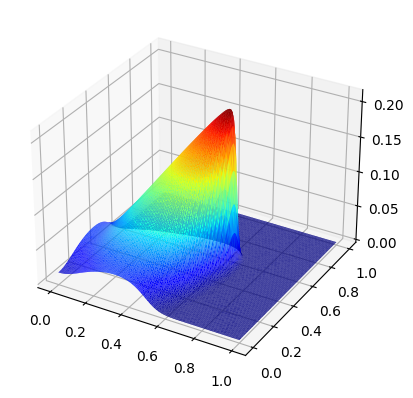

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(coords_x, coords_y, datas[500], cmap=cm.jet, linewidth=0)

In [15]:
mesh = torch.meshgrid(coords_x, coords_y)

/home/peiyi/mambaforge3/envs/rom/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541990/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


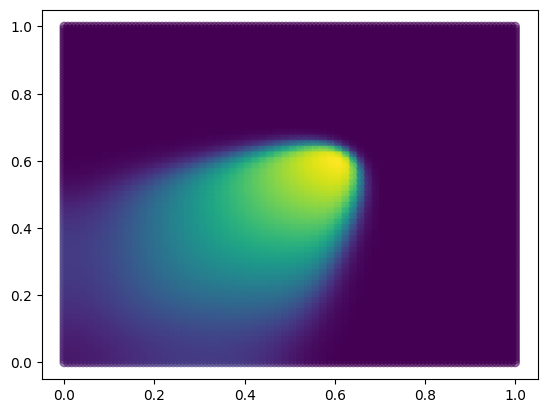

In [19]:
plt.scatter(coords_x, coords_y, c=datas[500], alpha=0.5)

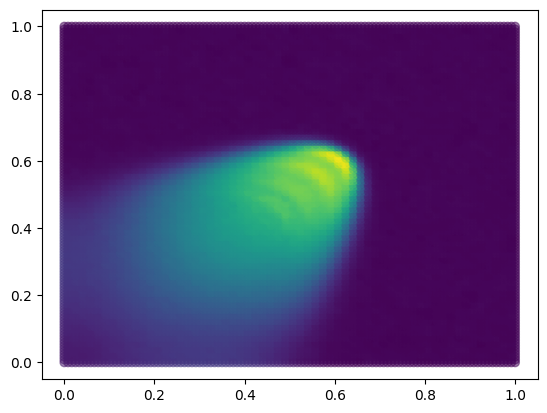

In [23]:
plt.scatter(coords_x, coords_y, c=approximates[500].detach().cpu(), alpha=0.5)